# Desafio de Inferência Tera - Resolução

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Tratamento de dados

Importando os pacotes necessários para a análise:

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 

Leitura dos bancos de dados:

In [3]:
demo = pd.read_csv('/content/drive/My Drive/Desafio Inferencia/DEMO_PHQ.csv')
pag_hei = pd.read_csv('/content/drive/My Drive/Desafio Inferencia/PAG_HEI.csv')

In [4]:
demo.info() # 5334 observações de adultos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5334 entries, 0 to 5333
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   SEQN      5334 non-null   int64  
 1   DPQ010    4836 non-null   float64
 2   DPQ020    4836 non-null   float64
 3   DPQ030    4836 non-null   float64
 4   DPQ040    4836 non-null   float64
 5   DPQ050    4836 non-null   float64
 6   DPQ060    4836 non-null   float64
 7   DPQ070    4836 non-null   float64
 8   DPQ080    4836 non-null   float64
 9   DPQ090    4836 non-null   float64
 10  RIAGENDR  5334 non-null   int64  
 11  RIDAGEYR  5334 non-null   int64  
 12  RIDRETH1  5334 non-null   int64  
 13  DMDEDUC   5334 non-null   int64  
 14  INDFMINC  5287 non-null   float64
dtypes: float64(10), int64(5)
memory usage: 625.2 KB


In [5]:
demo.head()

,SEQN,DPQ010,DPQ020,DPQ030,DPQ040,DPQ050,DPQ060,DPQ070,DPQ080,DPQ090,RIAGENDR,RIDAGEYR,RIDRETH1,DMDEDUC,INDFMINC
0,31130,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,85,3,4,4.0
1,31131,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,44,4,4,11.0
2,31132,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,70,3,5,11.0
3,31134,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,73,3,3,12.0
4,31139,0.0,0.0,0.0,0.0,3.0,1.0,0.0,0.0,0.0,2,18,2,3,11.0


In [6]:
pag_hei.info() # 9424 observações de crianças e adultos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9424 entries, 0 to 9423
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   SEQN                      9424 non-null   int64  
 1   PAG_MINW                  7150 non-null   float64
 2   ADHERENCE                 7150 non-null   float64
 3   HEI2015C1_TOTALVEG        8549 non-null   float64
 4   HEI2015C2_GREEN_AND_BEAN  8549 non-null   float64
 5   HEI2015C3_TOTALFRUIT      8549 non-null   float64
 6   HEI2015C4_WHOLEFRUIT      8549 non-null   float64
 7   HEI2015C5_WHOLEGRAIN      8549 non-null   float64
 8   HEI2015C6_TOTALDAIRY      8549 non-null   float64
 9   HEI2015C7_TOTPROT         8549 non-null   float64
 10  HEI2015C8_SEAPLANT_PROT   8549 non-null   float64
 11  HEI2015C9_FATTYACID       8549 non-null   float64
 12  HEI2015C10_SODIUM         8549 non-null   float64
 13  HEI2015C11_REFINEDGRAIN   8549 non-null   float64
 14  HEI2015C

Combinando o banco de dados

In [7]:
db = demo.merge(pag_hei, on = 'SEQN', how = 'left')
db.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5334 entries, 0 to 5333
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   SEQN                      5334 non-null   int64  
 1   DPQ010                    4836 non-null   float64
 2   DPQ020                    4836 non-null   float64
 3   DPQ030                    4836 non-null   float64
 4   DPQ040                    4836 non-null   float64
 5   DPQ050                    4836 non-null   float64
 6   DPQ060                    4836 non-null   float64
 7   DPQ070                    4836 non-null   float64
 8   DPQ080                    4836 non-null   float64
 9   DPQ090                    4836 non-null   float64
 10  RIAGENDR                  5334 non-null   int64  
 11  RIDAGEYR                  5334 non-null   int64  
 12  RIDRETH1                  5334 non-null   int64  
 13  DMDEDUC                   5334 non-null   int64  
 14  INDFMINC

### Tratamento das variáveis

Avaliando o percentual
 de casos faltantes (missing):

In [8]:
db.isnull().mean().round(4)*100

SEQN                        0.00
DPQ010                      9.34
DPQ020                      9.34
DPQ030                      9.34
DPQ040                      9.34
DPQ050                      9.34
DPQ060                      9.34
DPQ070                      9.34
DPQ080                      9.34
DPQ090                      9.34
RIAGENDR                    0.00
RIDAGEYR                    0.00
RIDRETH1                    0.00
DMDEDUC                     0.00
INDFMINC                    0.88
PAG_MINW                    0.00
ADHERENCE                   0.00
HEI2015C1_TOTALVEG          5.14
HEI2015C2_GREEN_AND_BEAN    5.14
HEI2015C3_TOTALFRUIT        5.14
HEI2015C4_WHOLEFRUIT        5.14
HEI2015C5_WHOLEGRAIN        5.14
HEI2015C6_TOTALDAIRY        5.14
HEI2015C7_TOTPROT           5.14
HEI2015C8_SEAPLANT_PROT     5.14
HEI2015C9_FATTYACID         5.14
HEI2015C10_SODIUM           5.14
HEI2015C11_REFINEDGRAIN     5.14
HEI2015C12_SFAT             5.14
HEI2015C13_ADDSUG           5.14
HEI2015_TO

Medidas resumo das variáveis quantitativas:

In [ ]:
db.drop(columns=['SEQN']).describe(percentiles = [.25, .5, .75, .95, .99]).round(2)

,DPQ010,DPQ020,DPQ030,DPQ040,DPQ050,DPQ060,DPQ070,DPQ080,DPQ090,RIAGENDR,RIDAGEYR,RIDRETH1,DMDEDUC,INDFMINC,PAG_MINW,ADHERENCE,HEI2015C1_TOTALVEG,HEI2015C2_GREEN_AND_BEAN,HEI2015C3_TOTALFRUIT,HEI2015C4_WHOLEFRUIT,HEI2015C5_WHOLEGRAIN,HEI2015C6_TOTALDAIRY,HEI2015C7_TOTPROT,HEI2015C8_SEAPLANT_PROT,HEI2015C9_FATTYACID,HEI2015C10_SODIUM,HEI2015C11_REFINEDGRAIN,HEI2015C12_SFAT,HEI2015C13_ADDSUG,HEI2015_TOTAL_SCORE
count,4836.00,4836.00,4836.00,4836.00,4836.00,4836.00,4836.00,4836.00,4836.00,5334.00,5334.00,5334.00,5334.00,5287.00,5334.00,5334.00,5060.00,5060.00,5060.00,5060.00,5060.00,5060.00,5060.00,5060.00,5060.00,5060.00,5060.00,5060.00,5060.00,5060.00
mean,0.31,0.31,0.55,0.72,0.32,0.21,0.23,0.15,0.05,1.52,45.09,2.87,3.23,8.74,471.77,1.98,3.20,1.81,2.49,2.36,1.76,3.76,4.43,2.59,4.71,4.76,5.80,6.07,6.22,49.97
std,0.76,0.71,0.93,0.91,0.74,0.62,0.64,0.59,0.33,0.50,20.15,1.13,1.27,12.78,780.35,0.92,1.47,2.14,1.95,2.17,1.92,1.61,1.01,2.17,3.24,3.42,3.50,3.18,3.33,12.32
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,18.00,1.00,1.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,16.06
25%,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,27.00,3.00,2.00,4.00,35.00,1.00,2.06,0.00,0.45,0.00,0.00,2.59,4.17,0.00,2.02,1.59,2.93,3.70,3.72,41.03
50%,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2.00,43.00,3.00,3.00,7.00,210.00,2.00,3.22,0.06,2.32,2.08,1.03,4.94,5.00,2.59,4.43,4.83,6.23,6.41,6.86,49.51
75%,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,2.00,62.00,4.00,4.00,10.00,568.93,3.00,4.83,4.50,4.94,5.00,3.41,5.00,5.00,5.00,7.27,7.65,9.25,9.00,9.45,58.17
95%,2.00,2.00,3.00,3.00,2.00,1.00,1.00,1.00,0.00,2.00,81.00,4.00,5.00,11.00,1863.05,3.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,10.00,10.00,10.00,10.00,10.00,71.19
99%,3.00,3.00,3.00,3.00,3.00,3.00,3.00,3.00,1.00,2.00,85.00,5.00,5.00,99.00,3672.06,3.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,10.00,10.00,10.00,10.00,10.00,79.86
max,9.00,9.00,9.00,9.00,9.00,9.00,9.00,9.00,9.00,2.00,85.00,5.00,9.00,99.00,10777.83,3.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,10.00,10.00,10.00,10.00,10.00,89.53


Avaliando frequências das variáveis qualitativas:

Distribuição dos escores para PHQ9

In [ ]:
db[[
"DPQ010",
"DPQ020",
"DPQ030",
"DPQ040",
"DPQ050",
"DPQ060",
"DPQ070",
"DPQ080",
"DPQ090"]].agg(['value_counts'])

,DPQ010,DPQ020,DPQ030,DPQ040,DPQ050,DPQ060,DPQ070,DPQ080,DPQ090
,value_counts,value_counts,value_counts,value_counts,value_counts,value_counts,value_counts,value_counts,value_counts
0.0,3850,3769,3152,2429,3813,4134,4070,4362,4667
1.0,673,769,1071,1706,691,513,545,341,122
2.0,180,179,286,370,160,95,118,79,32
3.0,124,114,320,326,168,89,99,45,13
9.0,9,5,7,5,4,5,4,9,2


Distribuição de raça:

In [ ]:
db[["RIDRETH1"]].value_counts(sort = False)

# RIDRETH1 com códigos errados no desafio
# 1	Mexican American	
# 2	Other Hispanic
# 3	Non-Hispanic White	
# 4	Non-Hispanic Black	
# 5	Other Race - Including Multi-Racial

RIDRETH1
1           1133
2            164
3           2516
4           1300
5            221
dtype: int64

Distribuição de escolaridade:

In [ ]:
db[["DMDEDUC"]].value_counts(sort = False)
# 1 = Menor que 9o ano
# 2 = 9-12o ano
# 3 = Ensino médio
# 4 = Ensino superior incompleto
# 5 = Superior completo ou maior
# 7 = Se recusou a responder
# 9 = Não sabe

DMDEDUC
1           618
2           936
3          1335
4          1498
5           939
7             4
9             4
dtype: int64

Distribuição de renda:

In [ ]:
db[["INDFMINC"]].value_counts(sort = False)
# 1 = 0-4999
# 2 - 5000-9999
# 3 = 10000-14999
# 4 = 15000-19999
# 5 = 20000-24999
# 6 = 25000-34999
# 7 = 35000-44999
# 8 = 45000-54999
# 9 = 55000-64999
# 10 = 65000-74999
# 11 = Maior ou igual a 75000
# 12 = Maior que 20000
# 13 = Menor que 20000
# 77 = Se recusou a responder
# 99 = Não sabe

INDFMINC
1.0          190
2.0          281
3.0          440
4.0          412
5.0          426
6.0          678
7.0          535
8.0          485
9.0          297
10.0         278
11.0        1044
12.0          78
13.0          30
77.0          36
99.0          77
dtype: int64

Distribuição de grupo de aderência:

In [ ]:
db[["ADHERENCE"]].value_counts(sort = False)

# 1 = Baixo (< 150 min/semana)
# 2 = Adequado (150-300 min/semana)
# 3 = Acima (> 300 min/semana)

ADHERENCE
1.0          2304
2.0           834
3.0          2196
dtype: int64

Agrupando/recategorizando variáveis qualitativas:

1) Substituindo as categorias 7 e 9 por missing para as variáveis DPQ0X0 e DMDEDUC

2) Agrupando as categorias 2 e 5 na variável RIDRETH1

3) Recategorizando a variável INDFMINC com o ponto médio de cada categoria por conter muitas categorias nesta variável. Iremos prosseguir a análise desta variável como uma variável quantitativa

In [9]:
replace_map = {
  "DPQ010": {7: np.nan, 9: np.nan},
  "DPQ020": {7: np.nan, 9: np.nan},
  "DPQ030": {7: np.nan, 9: np.nan},
  "DPQ040": {7: np.nan, 9: np.nan},
  "DPQ050": {7: np.nan, 9: np.nan},
  "DPQ060": {7: np.nan, 9: np.nan},
  "DPQ070": {7: np.nan, 9: np.nan},
  "DPQ080": {7: np.nan, 9: np.nan},
  "DPQ090": {7: np.nan, 9: np.nan},
  "RIDRETH1": {5: 2}, # Other
  "DMDEDUC": {7: np.nan, 9: np.nan},
  "INDFMINC": {1: np.mean([0,4999]), 2: np.mean([5000,9999]), 3: np.mean([10000,14999]),4: np.mean([15000,19999]),
               5: np.mean([20000,24999]),6: np.mean([25000,34999]), 7: np.mean([35000,44999]), 8: np.mean([45000,54999]),
               9: np.mean([55000,64999]), 10: np.mean([65000,74999]), 11: 75000, 12: np.mean([20000, 90000]), 13: np.mean([0, 19999]),
               77: np.nan, 99: np.nan}
}

db2 = db.replace(replace_map)

### Construção das variáveis

Checando casos faltantes para as variáveis do phq9:

In [ ]:
db2[["DPQ010", 
     "DPQ020", 
     "DPQ030", 
     "DPQ040",
     "DPQ050", 
     "DPQ060", 
     "DPQ070", 
     "DPQ080", 
     "DPQ090"]].isnull().mean()

DPQ010    0.095051
DPQ020    0.094301
DPQ030    0.094676
DPQ040    0.094301
DPQ050    0.094113
DPQ060    0.094301
DPQ070    0.094113
DPQ080    0.095051
DPQ090    0.093738
dtype: float64

Construindo variável phq9:

In [10]:
db2["phq9"] = db2[["DPQ010", 
                   "DPQ020", 
                   "DPQ030", 
                   "DPQ040", 
                   "DPQ050", 
                   "DPQ060", 
                   "DPQ070", 
                   "DPQ080", 
                   "DPQ090"]].sum(axis = 'columns', skipna = False)

db2[["DPQ010", 
     "DPQ020", 
     "DPQ030", 
     "DPQ040",
     "DPQ050", 
     "DPQ060", 
     "DPQ070", 
     "DPQ080", 
     "DPQ090",
     "phq9"]].head()

,DPQ010,DPQ020,DPQ030,DPQ040,DPQ050,DPQ060,DPQ070,DPQ080,DPQ090,phq9
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,3.0,1.0,0.0,0.0,0.0,4.0


Construindo variável phq_grp

In [11]:
conditions = [
  (db2['phq9'].isna()),
  (db2['phq9'] <= 5),
  (db2['phq9'] > 5) & (db2['phq9'] <= 9),
  (db2['phq9'] > 9) & (db2['phq9'] <= 14),
  (db2['phq9'] > 14) & (db2['phq9'] <= 19),
  (db2['phq9'] > 19)
    ]
values = [np.nan, 0, 1, 2, 3, 4]

db2["phq_grp"] = np.select(conditions, values) # Construindo variável

db2[["phq_grp"]].value_counts(sort = False) # Avaliando frequencia

phq_grp
0.0        4013
1.0         489
2.0         201
3.0          73
4.0          23
dtype: int64

Podemos construir novas variáveis a partir da variável phq_grp:

In [12]:
# Agrupando phq_grp em 0 = Sem sintomas, 1 = Sintomas leves, 2 = Sintomas moderados a severos

db2["phq_grp2"] = db2["phq_grp"].replace([3, 4], 2)

db2[["phq_grp2"]].value_counts(sort = False) # Avaliando frequencia

phq_grp2
0.0         4013
1.0          489
2.0          297
dtype: int64

1) Para as etapas de análise exploratória e teste de hipótese, utilizaremos a variável phq_grp2 com 3 níveis de sintomas de depressão. 

2) Como o percentual de missing está abaixo de 10% para todas as variáveis, seguiremos a análise utilizando apenas os dados completos. 

## EDA: Análise Univariada

In [13]:
var_quant = [
    "RIDAGEYR", 
    "INDFMINC", 
    "PAG_MINW", 
    "HEI2015C1_TOTALVEG",
    "HEI2015C2_GREEN_AND_BEAN",
    "HEI2015C3_TOTALFRUIT",
    "HEI2015C4_WHOLEFRUIT",
    "HEI2015C5_WHOLEGRAIN",
    "HEI2015C6_TOTALDAIRY",
    "HEI2015C7_TOTPROT",
    "HEI2015C8_SEAPLANT_PROT",
    "HEI2015C9_FATTYACID",
    "HEI2015C10_SODIUM",
    "HEI2015C11_REFINEDGRAIN",
    "HEI2015C12_SFAT",
    "HEI2015C13_ADDSUG",
    "HEI2015_TOTAL_SCORE",
    "phq9"]

var_quali = [
    "RIAGENDR",
    "RIDRETH1",
    "DMDEDUC",
    "ADHERENCE",
    "phq_grp2"
]

label_quali = {
  "RIAGENDR": {1: 'Masculino', 2: 'Feminino'},
  "RIDRETH1": {1: 'Americano Mexicano', 2: 'Outro', 3: 'Branco \n não hispânico', 4: 'Negro \n não hispânico'},
  "DMDEDUC": {1: "< 9 ano", 2: "9-12 ano", 3: "Ensino \n médio", 4: "Superior \n incompleto", 5: "Superior \n completo"},
  "ADHERENCE": {1: 'Baixo', 2: 'Adequado', 3: 'Acima'},
  "phq_grp2": {0: "Sem sintomas", 1: "Sintomas \n leves", 2: "Sintomas \n moderados-severos"}
}

In [ ]:
db2[var_quant].describe(percentiles = [.25, .5, .75, .95, .99]).round(2)

,RIDAGEYR,INDFMINC,PAG_MINW,HEI2015C1_TOTALVEG,HEI2015C2_GREEN_AND_BEAN,HEI2015C3_TOTALFRUIT,HEI2015C4_WHOLEFRUIT,HEI2015C5_WHOLEGRAIN,HEI2015C6_TOTALDAIRY,HEI2015C7_TOTPROT,HEI2015C8_SEAPLANT_PROT,HEI2015C9_FATTYACID,HEI2015C10_SODIUM,HEI2015C11_REFINEDGRAIN,HEI2015C12_SFAT,HEI2015C13_ADDSUG,HEI2015_TOTAL_SCORE,phq9
count,5334.00,5174.00,5334.00,5060.00,5060.00,5060.00,5060.00,5060.00,5060.00,5060.00,5060.00,5060.00,5060.00,5060.00,5060.00,5060.00,5060.00,4799.00
mean,45.09,40787.68,471.77,3.20,1.81,2.49,2.36,1.76,3.76,4.43,2.59,4.71,4.76,5.80,6.07,6.22,49.97,2.73
std,20.15,24247.24,780.35,1.47,2.14,1.95,2.17,1.92,1.61,1.01,2.17,3.24,3.42,3.50,3.18,3.33,12.32,3.73
min,18.00,2499.50,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,16.06,0.00
25%,27.00,17499.50,35.00,2.06,0.00,0.45,0.00,0.00,2.59,4.17,0.00,2.02,1.59,2.93,3.70,3.72,41.03,0.00
50%,43.00,39999.50,210.00,3.22,0.06,2.32,2.08,1.03,4.94,5.00,2.59,4.43,4.83,6.23,6.41,6.86,49.51,1.00
75%,62.00,69999.50,568.93,4.83,4.50,4.94,5.00,3.41,5.00,5.00,5.00,7.27,7.65,9.25,9.00,9.45,58.17,4.00
95%,81.00,75000.00,1863.05,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,10.00,10.00,10.00,10.00,10.00,71.19,10.00
99%,85.00,75000.00,3672.06,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,10.00,10.00,10.00,10.00,10.00,79.86,17.00
max,85.00,75000.00,10777.83,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,10.00,10.00,10.00,10.00,10.00,89.53,27.00


Dado que uma semana tem no máximo 168 horas (10080 minutos) o valor máximo de PAG_MINW não parece ser um valor possível. Nesse caso, iremos truncar o valor de PAG_MINW em 3600 minutos (60h semanais).





In [14]:
db2['PAG_MINW_trunc'] = np.where(db2['PAG_MINW'] > 3600, 3600, db2['PAG_MINW'])

db2[['PAG_MINW', 'PAG_MINW_trunc']].describe(percentiles = [.25, .5, .75, .95, .99]).round(2)

,PAG_MINW,PAG_MINW_trunc
count,5334.00,5334.00
mean,471.77,454.86
std,780.35,663.05
min,0.00,0.00
25%,35.00,35.00
50%,210.00,210.00
75%,568.93,568.93
95%,1863.05,1863.05
99%,3672.06,3600.00
max,10777.83,3600.00


Podemos transformar a variável PAG_MINW em horas:

In [15]:
db2["PAG_HRW"] = db2["PAG_MINW_trunc"]/60

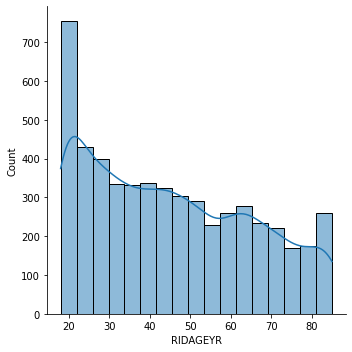

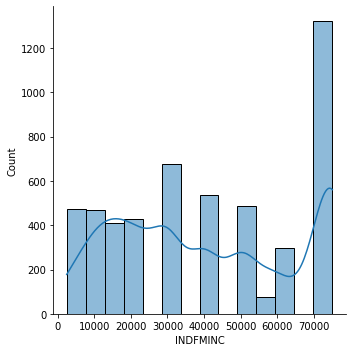

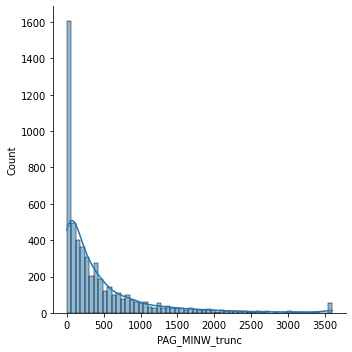

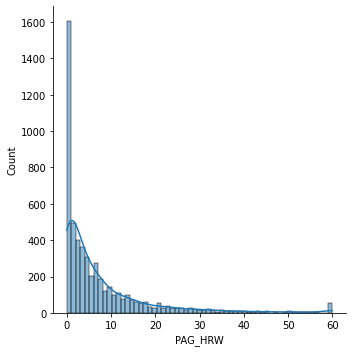

In [ ]:
sns.displot(db2, x="RIDAGEYR", kde=True)
sns.displot(db2, x="INDFMINC", kde=True)
sns.displot(db2, x="PAG_MINW_trunc", kde=True)
sns.displot(db2, x="PAG_HRW", kde=True)
plt.show()

Como a variável PAG_HRW é bastante assimétrica, podemos também criar uma versão com o log:

In [16]:
db2["PAG_HRW_log"] = np.log(db2["PAG_HRW"] + 1)

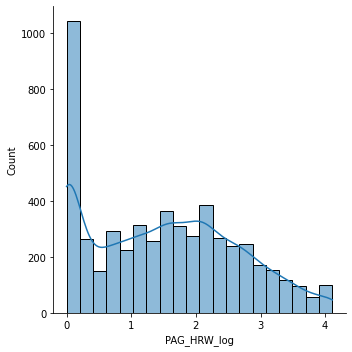

In [18]:
sns.displot(db2, x="PAG_HRW_log", kde=True)
plt.show()

Construindo função para construir gráficos de barras:

In [ ]:
# Função para construir gráfico de barras

def grafico_barras_prop(data, variable):
    (data[[variable]]
     .value_counts(normalize=True, sort = False)
     .rename("Proportion")
     .reset_index()
     .pipe((sns.barplot, "data"), x=variable, y="Proportion"))
    plt.ylim(0,1)
    plt.show()

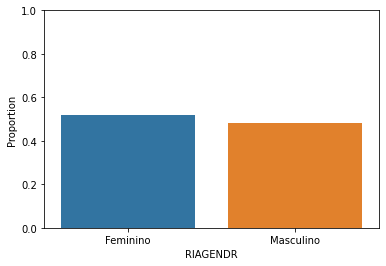

In [ ]:
grafico_barras_prop(db2.replace(label_quali), variable = "RIAGENDR")

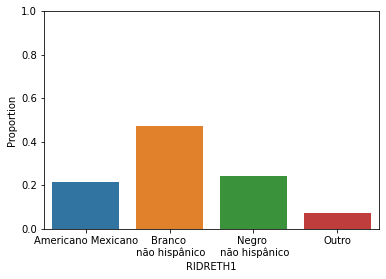

In [ ]:
grafico_barras_prop(db2.replace(label_quali), 
                    variable = "RIDRETH1")

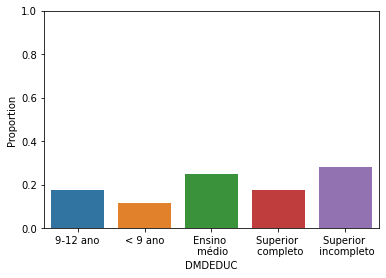

In [ ]:
grafico_barras_prop(db2.replace(label_quali), 
                    variable = "DMDEDUC")

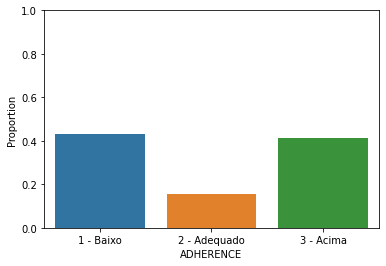

In [ ]:
grafico_barras_prop(db2.replace(label_quali), 
                    variable = "ADHERENCE")

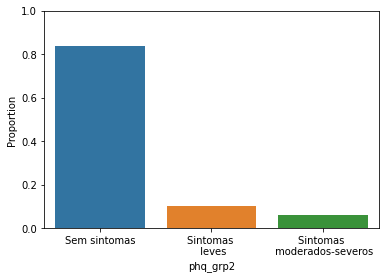

In [ ]:
grafico_barras_prop(db2.replace(label_quali), 
                    variable = "phq_grp2")

## EDA: Análise Bivariada + Teste de Hipóteses

Função para construir gráficos boxplot para uma variável quantitativa versus grupo de depressão

In [20]:
# Função para construir boxplot

def grafico_boxplot_grp(data, variable, label):
    
    if label == "": label = variable
    sns.boxplot(x="phq_grp2", y=variable, data=data)
    plt.ylabel(label)
    plt.show()

### A) Perfil com maiores incidências de sintomas de depressão

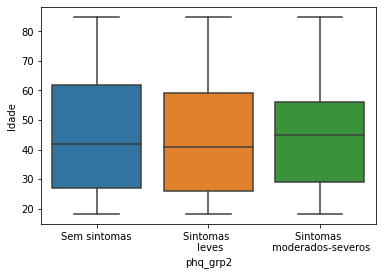

In [ ]:
grafico_boxplot_grp(db2.replace(label_quali), "RIDAGEYR", "Idade")

Teste de hipóteses:

In [ ]:
from scipy.stats import f_oneway

db_aux = db2[["phq_grp2", "RIDAGEYR"]].dropna()

stat, p = f_oneway(db_aux[(db_aux.phq_grp2 == 0)]["RIDAGEYR"],
                   db_aux[(db_aux.phq_grp2 == 1)]["RIDAGEYR"],
                   db_aux[(db_aux.phq_grp2 == 2)]["RIDAGEYR"])

print('stat=%.3f, p=%.3f' % (stat, p))

stat=1.002, p=0.367


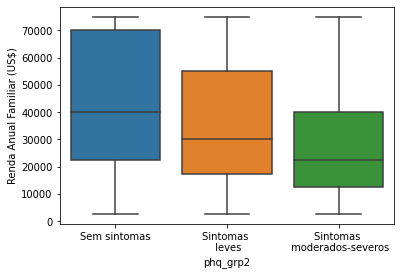

In [ ]:
grafico_boxplot_grp(db2.replace(label_quali), "INDFMINC", "Renda Anual Familiar (US$)")

Teste de hipóteses:

In [ ]:
from scipy.stats import f_oneway

db_aux = db2[["phq_grp2", "INDFMINC"]].dropna()

stat, p = f_oneway(db_aux[(db_aux.phq_grp2 == 0)]["INDFMINC"],
                   db_aux[(db_aux.phq_grp2 == 1)]["INDFMINC"],
                   db_aux[(db_aux.phq_grp2 == 2)]["INDFMINC"])

print('stat=%.3f, p=%.3f' % (stat, p))

stat=50.376, p=0.000


In [ ]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

tukey = pairwise_tukeyhsd(db_aux['INDFMINC'],
                  db_aux['phq_grp2'],
                  alpha = 0.05)

print(tukey)

     Multiple Comparison of Means - Tukey HSD, FWER=0.05      
group1 group2   meandiff  p-adj    lower       upper    reject
--------------------------------------------------------------
   0.0    1.0  -5537.0284 0.001  -8305.9614  -2768.0954   True
   0.0    2.0 -13537.8408 0.001 -16971.2327 -10104.4489   True
   1.0    2.0  -8000.8124 0.001 -12223.0265  -3778.5983   True
--------------------------------------------------------------


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


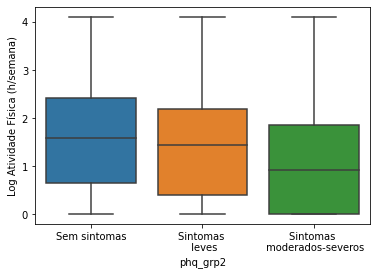

In [21]:
grafico_boxplot_grp(db2.replace(label_quali), "PAG_HRW_log", "Log Atividade Física (h/semana)")

In [22]:
from scipy.stats import f_oneway

db_aux = db2[["phq_grp2", "PAG_HRW_log"]].dropna()

stat, p = f_oneway(db_aux[(db_aux.phq_grp2 == 0)]["PAG_HRW_log"],
                   db_aux[(db_aux.phq_grp2 == 1)]["PAG_HRW_log"],
                   db_aux[(db_aux.phq_grp2 == 2)]["PAG_HRW_log"])

print('stat=%.3f, p=%.3f' % (stat, p))

stat=31.185, p=0.000


In [23]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

tukey = pairwise_tukeyhsd(db_aux['PAG_HRW_log'],
                  db_aux['phq_grp2'],
                  alpha = 0.05)

print(tukey)

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
   0.0    1.0  -0.1483 0.0157 -0.2739 -0.0226   True
   0.0    2.0  -0.5119  0.001 -0.6697 -0.3542   True
   1.0    2.0  -0.3636  0.001 -0.5566 -0.1707   True
----------------------------------------------------


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


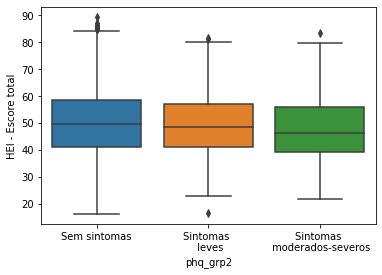

In [ ]:
grafico_boxplot_grp(db2.replace(label_quali), "HEI2015_TOTAL_SCORE", "HEI - Escore total")

In [ ]:
from scipy.stats import f_oneway

db_aux = db2[["phq_grp2", "HEI2015_TOTAL_SCORE"]].dropna()

stat, p = f_oneway(db_aux[(db_aux.phq_grp2 == 0)]["HEI2015_TOTAL_SCORE"],
                   db_aux[(db_aux.phq_grp2 == 1)]["HEI2015_TOTAL_SCORE"],
                   db_aux[(db_aux.phq_grp2 == 2)]["HEI2015_TOTAL_SCORE"])

print('stat=%.3f, p=%.3f' % (stat, p))

stat=7.119, p=0.001


In [ ]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

tukey = pairwise_tukeyhsd(db_aux['HEI2015_TOTAL_SCORE'],
                  db_aux['phq_grp2'],
                  alpha = 0.05)

print(tukey)

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
   0.0    1.0  -1.1066 0.1546 -2.5111  0.2978  False
   0.0    2.0  -2.5846 0.0017  -4.348 -0.8211   True
   1.0    2.0  -1.4779 0.2437 -3.6364  0.6805  False
----------------------------------------------------


### B) Perfil de hábitos saudáveis

Alimentação saudável x Exercícios Físicos

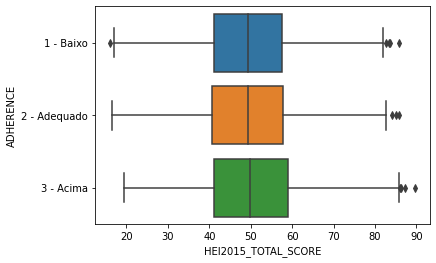

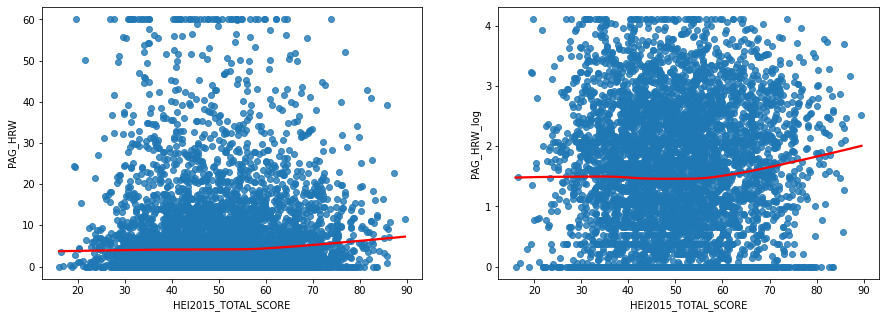

In [ ]:
sns.boxplot(y="ADHERENCE", 
            x="HEI2015_TOTAL_SCORE", 
            orient="h",
            data=db2.replace(label_quali))
plt.show()

fig, ax = plt.subplots(ncols=2, figsize=(15,5))

sns.regplot(x = 'HEI2015_TOTAL_SCORE', 
            y = 'PAG_HRW', 
            lowess=True, 
            line_kws={'color': 'red'},
            data = db2,
            ax = ax[0])

sns.regplot(x = 'HEI2015_TOTAL_SCORE', 
            y = 'PAG_HRW_log', 
            lowess=True, 
            line_kws={'color': 'red'},
            data = db2,
            ax = ax[1])
plt.show()

In [ ]:
from scipy.stats import f_oneway

db_aux = db2[["ADHERENCE", "HEI2015_TOTAL_SCORE"]].dropna()

stat, p = f_oneway(db_aux[(db_aux.ADHERENCE == 1)]["HEI2015_TOTAL_SCORE"],
                   db_aux[(db_aux.ADHERENCE == 2)]["HEI2015_TOTAL_SCORE"],
                   db_aux[(db_aux.ADHERENCE == 3)]["HEI2015_TOTAL_SCORE"])

print('stat=%.3f, p=%.3f' % (stat, p))

stat=4.122, p=0.016


In [ ]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

tukey = pairwise_tukeyhsd(db_aux['HEI2015_TOTAL_SCORE'],
                  db_aux['ADHERENCE'],
                  alpha = 0.05)

print(tukey)

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
   1.0    2.0   0.3937 0.7031  -0.805 1.5924  False
   1.0    3.0   1.0773  0.012  0.1931 1.9616   True
   2.0    3.0   0.6837  0.378 -0.5186 1.8859  False
---------------------------------------------------


Hábitos saudáveis x Gênero

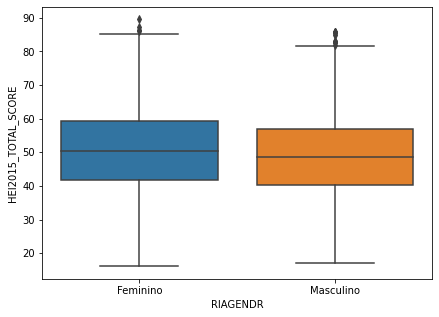

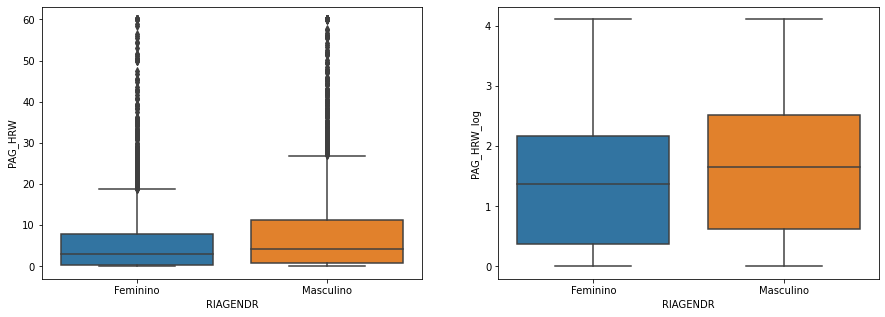

In [ ]:
plt.figure(figsize=(7,5))
sns.boxplot(x="RIAGENDR", 
            y="HEI2015_TOTAL_SCORE", 
            data=db2.replace(label_quali))
plt.show()

fig, ax = plt.subplots(ncols=2, figsize=(15,5))
sns.boxplot(x="RIAGENDR", 
            y="PAG_HRW", 
            data=db2.replace(label_quali),
            ax = ax[0])

sns.boxplot(x="RIAGENDR", 
            y="PAG_HRW_log", 
            data=db2.replace(label_quali),
            ax = ax[1])
plt.show()

In [ ]:
from scipy.stats import f_oneway

db_aux = db2[["RIAGENDR", "PAG_HRW", "PAG_HRW_log", "HEI2015_TOTAL_SCORE"]].dropna()

stat, p = f_oneway(db_aux[(db_aux.RIAGENDR == 1)]["HEI2015_TOTAL_SCORE"],
                   db_aux[(db_aux.RIAGENDR == 2)]["HEI2015_TOTAL_SCORE"])

print('stat=%.3f, p=%.3f' % (stat, p))

stat=27.216, p=0.000


In [ ]:
from scipy.stats import f_oneway

db_aux = db2[["RIAGENDR", "PAG_HRW", "PAG_HRW_log", "HEI2015_TOTAL_SCORE"]].dropna()

stat, p = f_oneway(db_aux[(db_aux.RIAGENDR == 1)]["PAG_HRW_log"],
                   db_aux[(db_aux.RIAGENDR == 2)]["PAG_HRW_log"])

print('stat=%.3f, p=%.3f' % (stat, p))

Hábitos saudáveis e Raça

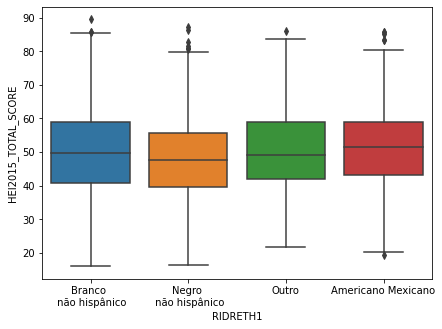

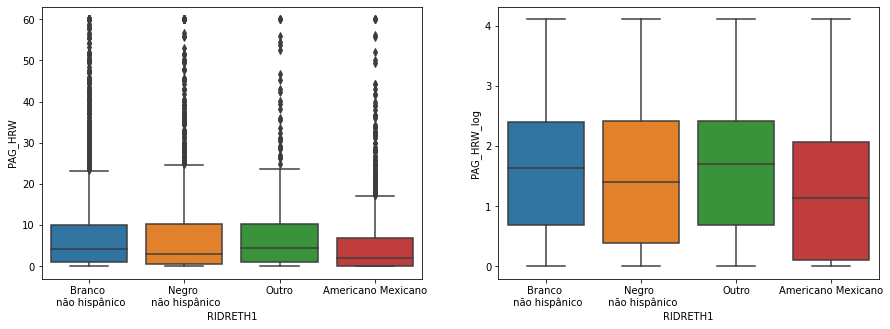

In [ ]:
plt.figure(figsize=(7,5))
sns.boxplot(x="RIDRETH1", 
            y="HEI2015_TOTAL_SCORE", 
            data=db2.replace(label_quali))
plt.show()

fig, ax = plt.subplots(ncols=2, figsize=(15,5))
sns.boxplot(x="RIDRETH1", 
            y="PAG_HRW", 
            data=db2.replace(label_quali),
            ax = ax[0])

sns.boxplot(x="RIDRETH1", 
            y="PAG_HRW_log", 
            data=db2.replace(label_quali),
            ax = ax[1])
plt.show()

In [ ]:
from scipy.stats import f_oneway

db_aux = db2[["RIDRETH1", "PAG_HRW", "PAG_HRW_log", "HEI2015_TOTAL_SCORE"]].dropna()

stat, p = f_oneway(db_aux[(db_aux.RIDRETH1 == 1)]["HEI2015_TOTAL_SCORE"],
                   db_aux[(db_aux.RIDRETH1 == 2)]["HEI2015_TOTAL_SCORE"],
                   db_aux[(db_aux.RIDRETH1 == 3)]["HEI2015_TOTAL_SCORE"],
                   db_aux[(db_aux.RIDRETH1 == 4)]["HEI2015_TOTAL_SCORE"])

print('stat=%.3f, p=%.3f' % (stat, p))

stat=11.860, p=0.000


In [ ]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

tukey = pairwise_tukeyhsd(db_aux['HEI2015_TOTAL_SCORE'],
                  db_aux['RIDRETH1'],
                  alpha = 0.05)

print(tukey)

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
     1      2   -0.964  0.556 -2.8709   0.943  False
     1      3  -1.0955 0.0718 -2.2542  0.0632  False
     1      4  -2.9767  0.001 -4.2992 -1.6541   True
     2      3  -0.1315    0.9 -1.8988  1.6357  False
     2      4  -2.0127 0.0302 -3.8914  -0.134   True
     3      4  -1.8812  0.001 -2.9928 -0.7696   True
----------------------------------------------------


In [ ]:
from scipy.stats import f_oneway

stat, p = f_oneway(db_aux[(db_aux.RIDRETH1 == 1)]["PAG_HRW_log"],
                   db_aux[(db_aux.RIDRETH1 == 2)]["PAG_HRW_log"],
                   db_aux[(db_aux.RIDRETH1 == 3)]["PAG_HRW_log"],
                   db_aux[(db_aux.RIDRETH1 == 4)]["PAG_HRW_log"])

print('stat=%.3f, p=%.3f' % (stat, p))

stat=25.845, p=0.000


In [ ]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

tukey = pairwise_tukeyhsd(db_aux['PAG_HRW_log'],
                  db_aux['RIDRETH1'],
                  alpha = 0.05)

print(tukey)

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
     1      2   0.3757  0.001  0.2016  0.5499   True
     1      3   0.3502  0.001  0.2444   0.456   True
     1      4    0.229  0.001  0.1082  0.3498   True
     2      3  -0.0255    0.9 -0.1869  0.1359  False
     2      4  -0.1467 0.1241 -0.3183  0.0248  False
     3      4  -0.1212 0.0116 -0.2227 -0.0197   True
----------------------------------------------------
